In [1]:
print('We are ready to go!')

We are ready to go!


In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [2]:

# Load dataset
data = pd.read_csv("C:\VILLGAX\CODES\Data\creditcard.csv")

In [3]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [5]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()
print("details of valid transaction")
valid.Amount.describe()

Amount details of the fraudulent transaction
details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

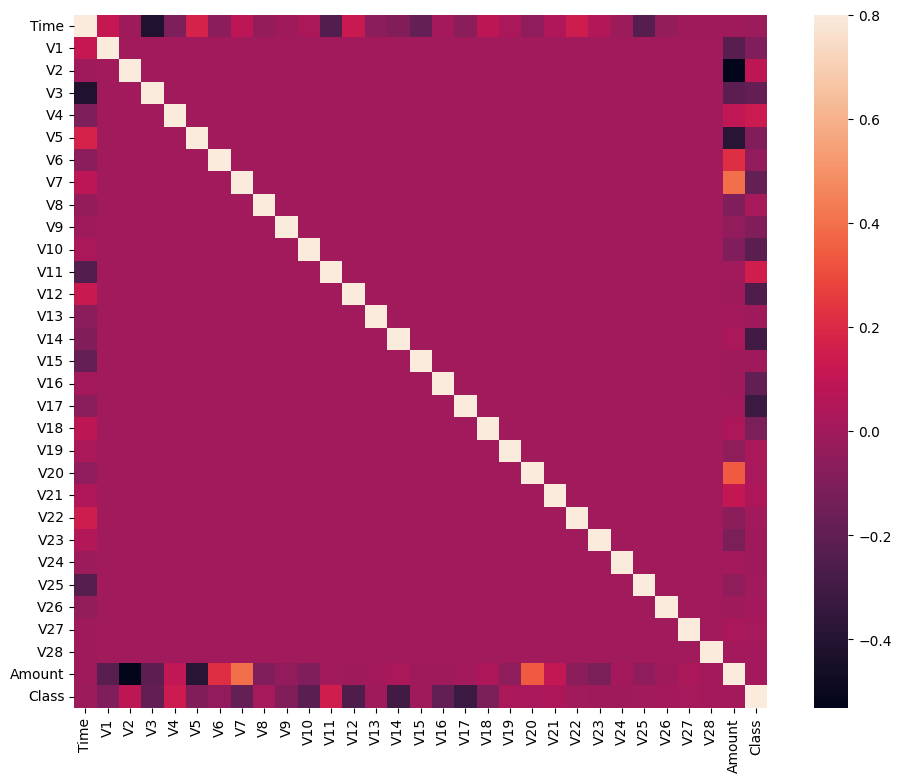

In [7]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [9]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
print(X.head)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)
<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0      

In [10]:
# Using Scikit-learn to split data into training and test sets
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(227845, 30)

In [28]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [30]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


In [32]:
import pickle
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(rfc, f)

## RAG Pipeline

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Normalize 'Amount' column
data['NormAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount', 'Time'], axis=1)

# Split fraudulent and non-fraudulent transactions
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

print("Data ready for vectorization.")

Data ready for vectorization.


In [34]:
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma

# Initialize LangChain's SentenceTransformerEmbeddings
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# Initialize ChromaDB with the embedding model
vectorstore = Chroma(persist_directory="fraud_db", embedding_function=embedding_model)

C:\Users\amish\AppData\Local\Temp\ipykernel_16856\3813279933.py:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
c:\Users\amish\anaconda3\envs\fraudsense\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\amish\AppData\Local\Temp\ipykernel_16856\3813279933.py:8: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the cl

In [36]:
# Convert each row of transaction data into a single string
texts = [" ".join(map(str, row)) for row in fraud_data.drop('Class', axis=1).values]

# Add texts and metadata to ChromaDB
vectorstore.add_texts(
    texts=texts
)

print("Stored fraudulent transaction embeddings in ChromaDB.")

Stored fraudulent transaction embeddings in ChromaDB.


In [37]:
# Query ChromaDB for similar transactions
def query_similar_transactions(transaction_features, top_k=5):
    transaction_text = " ".join(map(str, transaction_features))
    results = vectorstore.similarity_search(transaction_text, k=top_k)
    return results

# Example query
example_transaction = fraud_data.iloc[0].drop('Class').tolist()
similar_transactions = query_similar_transactions(example_transaction)
print("Retrieved similar transactions:", similar_transactions)

Retrieved similar transactions: [Document(metadata={}, page_content='-2.3122265423263 1.95199201064158 -1.60985073229769 3.9979055875468 -0.522187864667764 -1.42654531920595 -2.53738730624579 1.39165724829804 -2.77008927719433 -2.77227214465915 3.20203320709635 -2.89990738849473 -0.595221881324605 -4.28925378244217 0.389724120274487 -1.14074717980657 -2.83005567450437 -0.0168224681808257 0.416955705037907 0.126910559061474 0.517232370861764 -0.0350493686052974 -0.465211076182388 0.320198198514526 0.0445191674731724 0.177839798284401 0.261145002567677 -0.143275874698919 -0.35322939296682354'), Document(metadata={}, page_content='-2.78386548658584 1.59682357624614 -2.08484398883683 2.51298558446866 -1.44674856585353 -0.828495614406621 -0.732262192061793 -0.203328860039345 -0.347045718430565 -2.16206139007752 1.96612345703981 -3.12745594474482 0.506574101009247 -5.92613104122097 0.931090795564338 -2.49930719432672 -3.71275186652084 -1.1421334371849 0.626240855695279 -0.515000920121256 0.2

In [38]:
# Convert the ChromaDB vectorstore into a retriever
retriever = vectorstore.as_retriever()

In [40]:
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA

# Create a prompt template
prompt_template = PromptTemplate(
    input_variables=["question", "context"],
    template="""
    A transaction was flagged as suspicious:
    {question}

    Relevant past transactions and patterns:
    {context}

    Based on the provided details, explain why this transaction might be fraudulent.
    """
)

In [42]:
# Create the RetrievalQA chain
from langchain.llms import OpenAI
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
retrieval_qa = RetrievalQA.from_chain_type(
    llm=OpenAI(api_key=api_key),
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt_template}
)

In [44]:
# Example flagged transaction
transaction_details = "Transaction of $10,000 at 2 AM from a new device."

# Generate explanation
explanation = retrieval_qa({'query' :transaction_details})
print("Generated Explanation:")
print(explanation['result'])

Generated Explanation:

    This transaction may be fraudulent because it involves a large amount of money ( $10,000) and occurs at an unusual time (2 AM). Additionally, it is being made from a new device, which could be a sign of fraudulent activity. The past transaction patterns also show a history of large, irregular transactions, which could indicate a pattern of suspicious activity.
